In [24]:
#imports
import re
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt




In [25]:
# Função para extrair o ano de uma string de texto usando expressão regular
def extract_years(text):
    years = re.findall(r'\b\d{4}\b', text)
    return [int(year) for year in years]

In [26]:
# Definir a lista de STOPWORDS
STOPWORDS = ['ver', 'principal', 'essa', 'vez', 'nas', 'mas',
             'qual', 'principal', 'ele', 'ter', 'doença', 'pois', 'este',
             'vez', 'ver principal', 'artigo principal', 'já',
             'aos', 'pode', 'outro', 'artigo', 'desse',
             'alguns', 'meio', 'entre', 'das', 'podem', 'esse',
             'seu', 'também', 'são', 'quando', 'de', 'que', 'em',
             'os', 'as', 'da', 'como', 'dos', 'ou', 'se', 'um', 'uma',
             'para', 'na', 'ao', 'mais', 'por', 'não', 'ainda', 'muito', 'sua',
             'a', 'é', 'o', 'e','u', 'no', 'do',
             'isso', 'ser', 'será', 'serão', 'foi', 'são', 'sobre',
             'todos', 'tudo', 'todas', 'todavia', 'tão', 'tem', 'têm',
             'temos', 'teve', 'tenham', 'terá', 'terão', 'teremos',
             'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'teve', 'tidos',
             'tevemos', 'teverá', 'teverão', 'teveríamos', 'teve', 'tivesse',
             'tivessem', 'tivéramos', 'tivéssemos', 'tudo', 'um', 'uma', 'umas', 'uns',
             ]


In [27]:
# Configurações do Selenium
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)

In [28]:
# URL da página de notícias
url = 'https://www.ufrn.br/imprensa/noticias/filtros?text=eaj'
driver.get(url)


In [29]:
# Esperar carregar
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'blue-link')))


<selenium.webdriver.remote.webelement.WebElement (session="b19b5b9c28dd1400d3a69319b580f37b", element="73C734617D08EEA041AA6E9F9EA7100B_element_12")>

In [30]:
# Coletar links e textos das notícias
title_news = driver.find_elements(By.CLASS_NAME, 'blue-link')
n_news = len(title_news)  # Quantas notícias na página atual

text_to_cloud = ''
all_years = []  # Lista para armazenar todos os anos

In [31]:
# Função para encontrar o elemento de texto da notícia
def find_text(driver):
    element = driver.find_element(By.CLASS_NAME, 'noticia')
    if element:
        return element
    else:
        return False


In [32]:
# Coletar notícias e extrair anos
for i in range(n_news):
    title_news = driver.find_elements(By.CLASS_NAME, 'blue-link')
    link = title_news[i].get_attribute('href')
    link_text = title_news[i].text
    if 'imprensa' in link and 'EAJ' in link_text:
        print(link)
        print(link_text)
        driver.get(link)
        wait.until(find_text)
        news_text = driver.find_element(By.CLASS_NAME, 'noticia').text
        print('--------------------------------------------')
        print(news_text)
        extracted_years = extract_years(news_text)
        if extracted_years:
            print(f'Anos extraídos: {extracted_years}')
            all_years.extend(extracted_years)
        else:
            print('Anos não encontrados')
        print('--------------------------------------------')
        text_to_cloud += news_text

        driver.back()

# Fechar o driver do Selenium
driver.close()

https://www.ufrn.br/imprensa/noticias/74955/ufrn-empossa-nova-direcao-da-eaj
UFRN empossa nova Direção da EAJ
--------------------------------------------
UFRN empossa nova Direção da EAJ
26 de setembro de 2023 (Atualizado em 26 de setembro de 2023 às 12:41)
EAJ
Posse nova direção
Recondução
Williane Silva de Ascom-Reitoria
Foto: Cícero Oliveira
A Universidade Federal do Rio Grande do Norte (UFRN) realizou na manhã desta terça-feira, 26 de setembro, a cerimônia de recondução da Direção da Escola Agrícola de Jundiaí (EAJ). O reitor José Daniel Diniz Melo presidiu a cerimônia, que deu posse aos professores Ivan Max Freire de Lacerda e Márcio Dias Pereira, como diretor e vice-diretor, respectivamente, para o quadriênio de 2023 a 2027. 
“Vocês renovam a responsabilidade de conduzir essa unidade acadêmica de extrema relevância para a UFRN. Afinal, a EAJ coleciona décadas de uma história marcada por crescimento, aprendizado e compromisso social, que contribui para o cumprimento da nossa miss

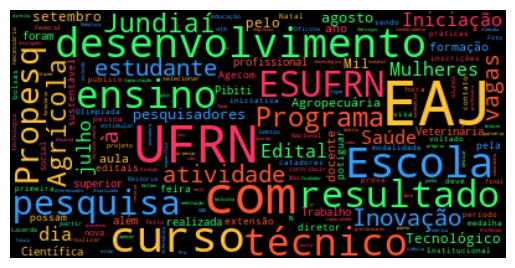

In [33]:
# Criar a nuvem de palavras com paleta de cores personalizada
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#FF5733', '#339FFF', '#33FF6C', '#FF3361', '#FFC233']
    return np.random.choice(colors)

wordcloud = WordCloud(
    background_color="black",
    max_font_size=50,
    max_words=300,
    stopwords=STOPWORDS,
    collocations=False,  # Desativa a detecção de bigramas
    color_func=custom_color_func  # Define a função de cores personalizada
)

wordcloud.generate(text_to_cloud)

# Salvar a nuvem de palavras em um arquivo de imagem
wordcloud.to_file("wordCloud.png")

# Exibir a nuvem de palavras
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

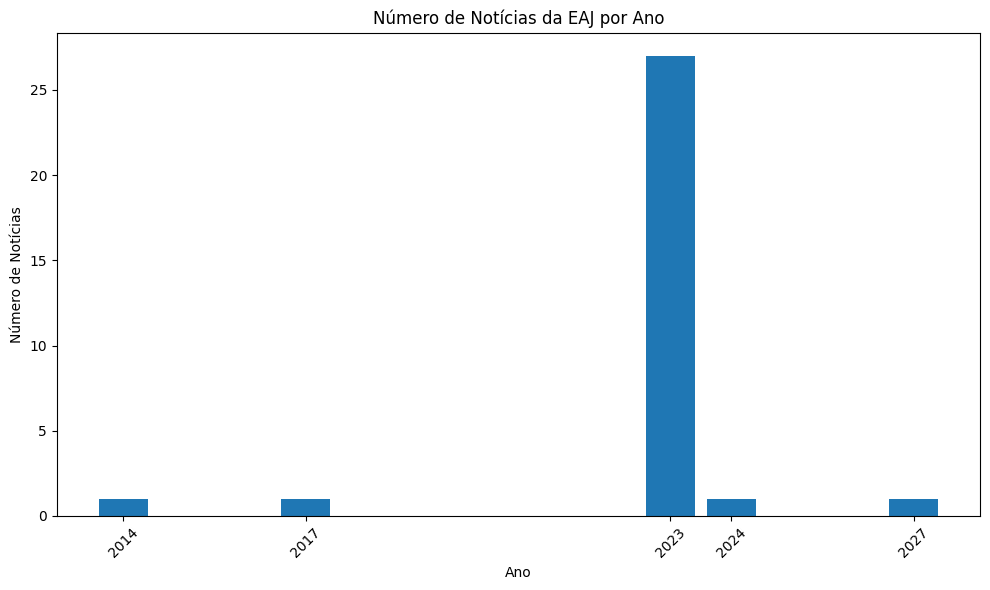

In [34]:
# Criar o gráfico de barras
if all_years:
    # Contar o número de notícias por ano
    year_counts = {}
    for year in all_years:
        if year in year_counts:
            year_counts[year] += 1
        else:
            year_counts[year] = 1

    # Ordenar os anos em ordem crescente
    sorted_years = sorted(year_counts.keys())

    # Criar listas para os anos e o número de notícias
    sorted_counts = [year_counts[year] for year in sorted_years]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_years, sorted_counts)
    plt.xlabel('Ano')
    plt.ylabel('Número de Notícias')
    plt.title('Número de Notícias da EAJ por Ano')
    plt.xticks(sorted_years, rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum ano encontrado para criar o gráfico de barras.")





